In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [25]:

df = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/acea-water-prediction/Water_Spring_Amiata.csv")
df.head()

,Date,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.15,NaN,NaN,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55,NaN,NaN,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.70,NaN,NaN,NaN,NaN,NaN
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.60,NaN,NaN,NaN,NaN,NaN


In [26]:
def get_df():
    df = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/acea-water-prediction/Water_Spring_Amiata.csv")
    df.head()
    df['date'] = pd.to_datetime(df['Date'])
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month
    return df

df = get_df()
df.tail(10)

,Date,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta,date,year,month
7477,21/06/2020,0.0,0.0,0.0,0.0,0.0,-38.39,-51.90,NaN,18.35,17.35,16.55,-0.341945,-2.778991,-5.46878,-20.290913,2020-06-21,2020,6
7478,22/06/2020,0.2,6.4,3.2,5.0,0.0,-38.39,-51.90,NaN,19.70,18.50,18.70,-0.359942,-2.925253,-5.75661,-21.358856,2020-06-22,2020,6
7479,23/06/2020,0.0,0.0,0.0,0.0,0.0,-38.39,-51.90,NaN,20.30,19.45,19.20,-0.359942,-2.925253,-5.75661,-21.358856,2020-06-23,2020,6
7480,24/06/2020,0.0,0.0,0.0,0.0,0.0,-38.39,-51.90,NaN,21.15,19.25,19.30,-0.359942,-2.925253,-5.75661,-21.358856,2020-06-24,2020,6
7481,25/06/2020,0.0,0.0,0.0,0.0,0.0,-38.38,-51.90,-303.27,21.45,18.20,19.80,-0.359942,-2.925253,-5.75661,-21.358856,2020-06-25,2020,6
7482,26/06/2020,0.0,0.0,0.0,0.0,0.0,-38.38,-51.89,-303.27,20.70,18.30,19.20,-0.359942,-2.925253,-5.75661,-21.358856,2020-06-26,2020,6
7483,27/06/2020,0.0,0.0,0.0,0.0,0.0,-38.38,-51.89,-303.27,20.50,17.95,18.85,-0.359942,-2.925253,-5.75661,-21.358856,2020-06-27,2020,6
7484,28/06/2020,0.0,0.0,0.0,0.0,0.0,-38.38,-51.89,-303.27,22.10,19.90,20.45,-0.341945,-2.778991,-5.46878,-20.290913,2020-06-28,2020,6
7485,29/06/2020,0.0,0.0,0.0,0.0,0.0,-38.37,-51.89,-303.28,22.45,20.15,20.20,-0.359942,-2.925253,-5.75661,-21.358856,2020-06-29,2020,6
7486,30/06/2020,0.0,0.0,0.0,0.0,0.0,-38.37,-51.89,-303.27,22.00,20.35,21.10,-0.359942,-2.925253,-5.75661,-21.358856,2020-06-30,2020,6


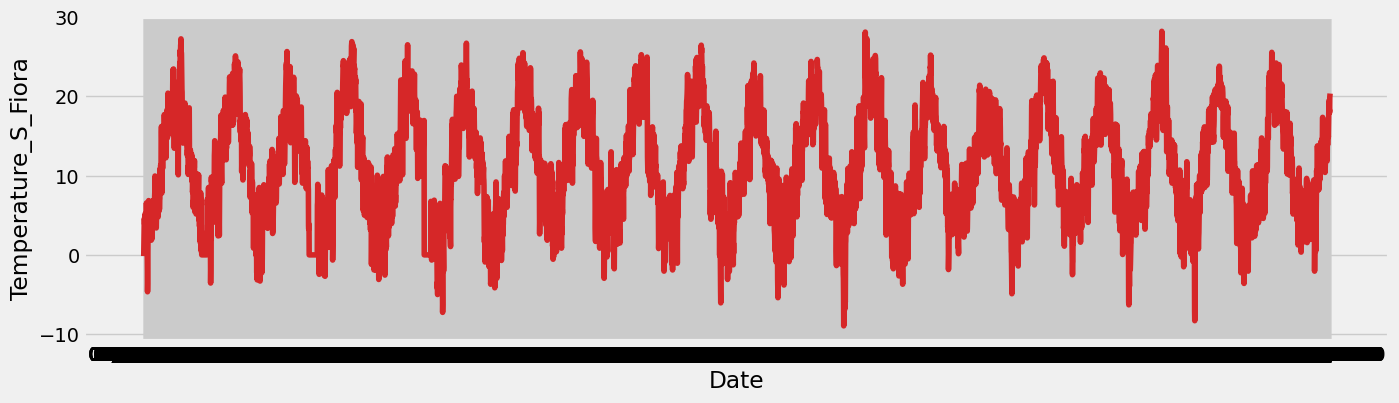

In [46]:
def plot_df(df, x, y, xlabel='Date', ylabel='Temperature_S_Fiora', dpi=100, color="blue"):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set( xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df, x=df['Date'], y=df['Temperature_S_Fiora'], color="tab:red")

In [51]:
df['Temperature_S_Fiora'].describe()

count    7487.000000
mean       11.248898
std         6.818232
min        -8.950000
25%         5.950000
50%        11.050000
75%        16.750000
max        28.200000
Name: Temperature_S_Fiora, dtype: float64

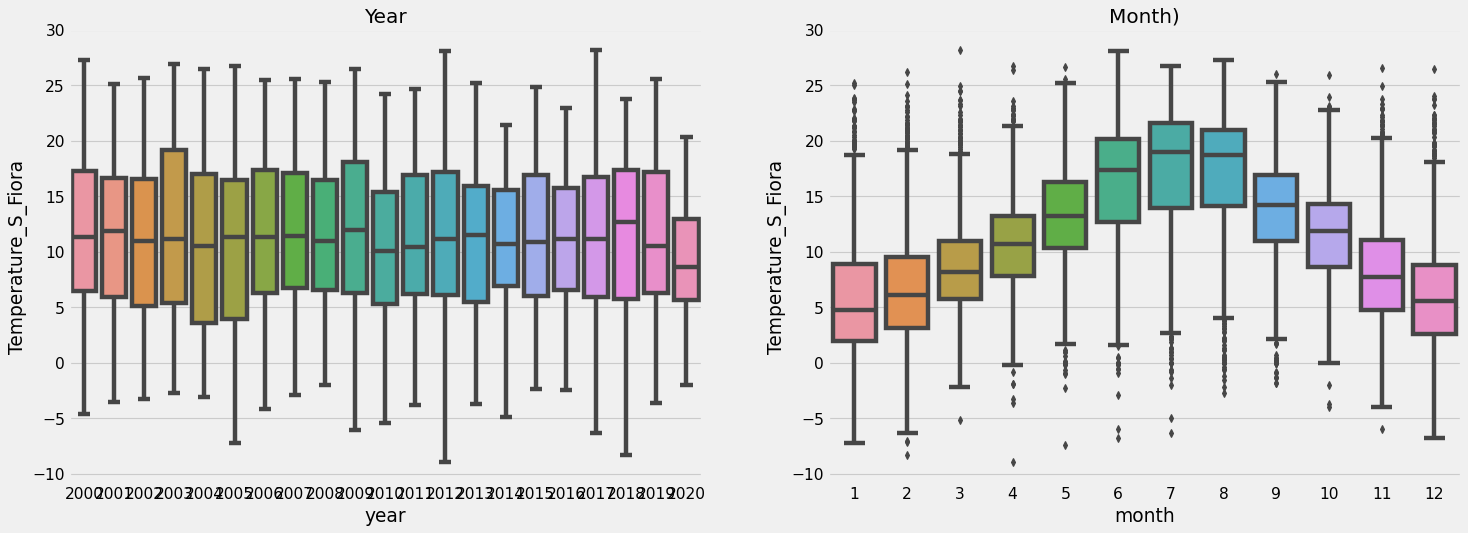

In [28]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Temperature_S_Fiora', data=df, ax=axes[0])
sns.boxplot(x='month', y='Temperature_S_Fiora', data=df)

# Set Title
axes[0].set_title('Year', fontsize=18); 
axes[1].set_title('Month)', fontsize=18)
plt.show()

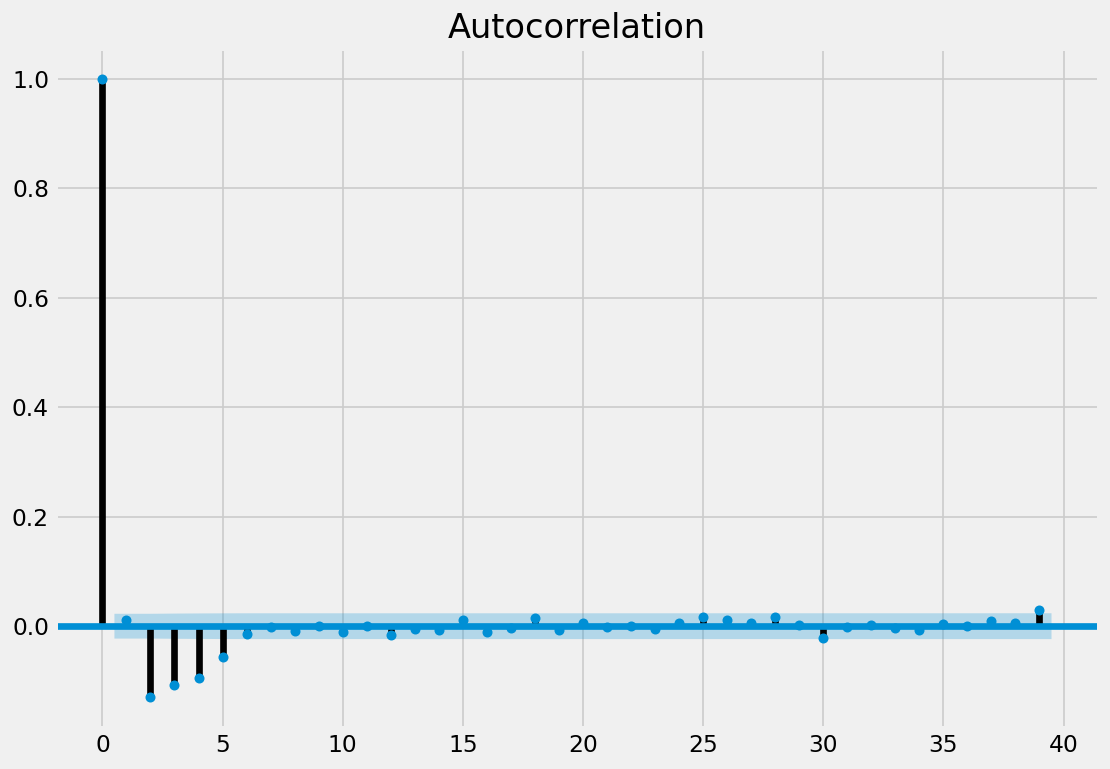

In [29]:
# First Order Differencing
ts_diff = np.diff(df['Temperature_S_Fiora'])
df['Temperature_diff1'] = np.append([0], ts_diff)

plot_acf(df['Temperature_diff1'])
dataset = df['Temperature_diff1'].values

In [30]:
df = get_df()
dataset = df['Temperature_S_Fiora']
dataframe = pd.concat([dataset.shift(1), dataset], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.963359
t+1  0.963359  1.000000


# AR

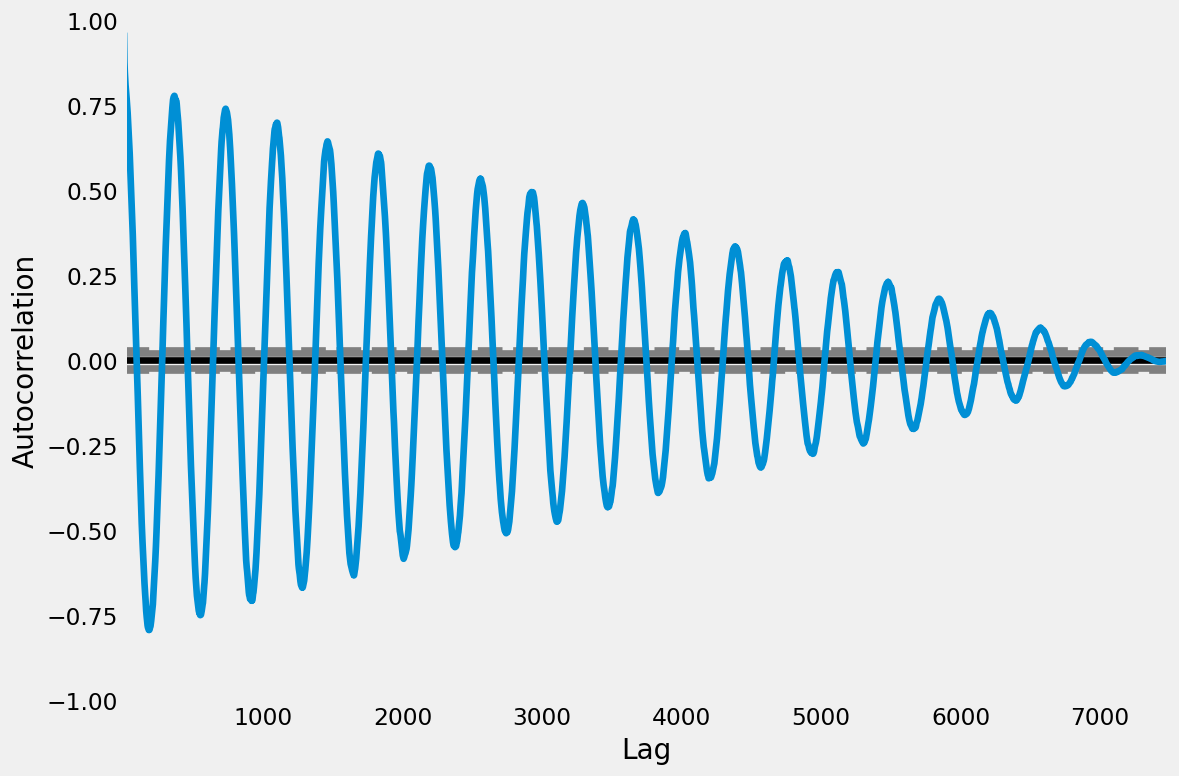

In [31]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(dataset)

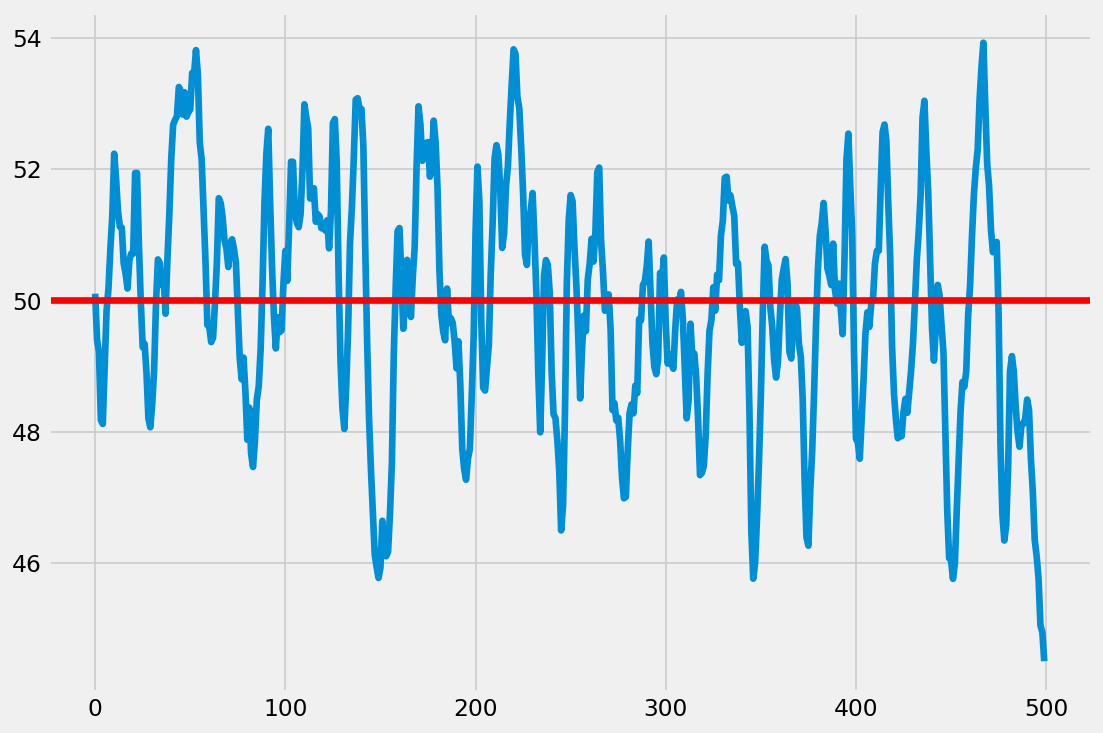

In [32]:
p1 = 1.5
p2 = -0.6
c = 5
w = 0.5
T = 500
mean = c/(1-p1-p2)

ar_data = np.zeros(T)
ar_data[0] = mean + np.random.normal(0, w)
ar_data[1] = mean + np.random.normal(0, w)
for t in range(2, T):
    ar_data[t] = c + p1*ar_data[t-1] + p2*ar_data[t-2] + np.random.normal(0, w)


plt.plot(ar_data)
plt.axhline(y=mean, color='r', linestyle='-')

In [33]:
import statsmodels.api as sm

model = sm.tsa.AR(ar_data)
print("Order of model: ", model.select_order(maxlag=6, ic='aic')) 

Order of model:  3


In [34]:
predicted_model = model.fit(maxlag=3)
print(" : ", predicted_model.params)

Params of model:  [ 4.65944954  1.54117763 -0.69308157  0.0585361 ]


In [35]:
pred = predicted_model.predict(3, 300)
rmse = np.sqrt(mean_squared_error(ar_data[3:301], pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.531


In [36]:
model = sm.tsa.AR(ar_data)
print("Order of model: ", model.select_order(maxlag=6, ic='aic')) 
predicted_model = model.fit(maxlag=2)
print("Params of model: ", predicted_model.params)

pred = predicted_model.predict(2, 300)
rmse = np.sqrt(mean_squared_error(ar_data[2:301], pred))
print('Test RMSE: %.3f' % rmse)

Order of model:  3
Params of model:  [ 4.97755493  1.50551301 -0.60523476]
Test RMSE: 0.531


In [37]:
model = sm.tsa.AR(ar_data)
print("Order of model: ", model.select_order(maxlag=6, ic='aic')) 
predicted_model = model.fit(maxlag=4)
print("Params of model: ", predicted_model.params)
print(predicted_model.summary())

pred = predicted_model.predict(4, 300)
rmse = np.sqrt(mean_squared_error(ar_data[4:301], pred))
print('Test RMSE: %.3f' % rmse)

Order of model:  3
Params of model:  [ 4.43266932  1.54006966 -0.66821537 -0.00524471  0.04459854]
                               AR Model Results                               
Dep. Variable:                      y   No. Observations:                  500
Model:                          AR(4)   Log Likelihood                -370.060
Method:                          cmle   S.D. of innovations              0.510
Date:                Mon, 14 Nov 2022   AIC                             -1.322
Time:                        07:01:22   BIC                             -1.271
Sample:                             0   HQIC                            -1.302
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4327      0.732      6.052      0.000       2.997       5.868
L1.y           1.5401      0.045

Coefficients: [ 0.00314671 -0.03819858 -0.17335562 -0.14441234 -0.1468768  -0.1180915
 -0.08526607 -0.07121043 -0.06867397 -0.04718867 -0.05044881 -0.02679067
 -0.04231213]
predicted=-0.031930, expected=1.550000
predicted=-0.170548, expected=1.150000
predicted=-0.225584, expected=0.950000
predicted=-0.114116, expected=-0.200000
predicted=-0.116874, expected=-1.050000
predicted=0.104365, expected=0.100000
predicted=0.015073, expected=-0.350000
predicted=0.021777, expected=1.950000
predicted=0.089741, expected=0.250000
predicted=-0.010752, expected=0.200000
Test RMSE: 1.021


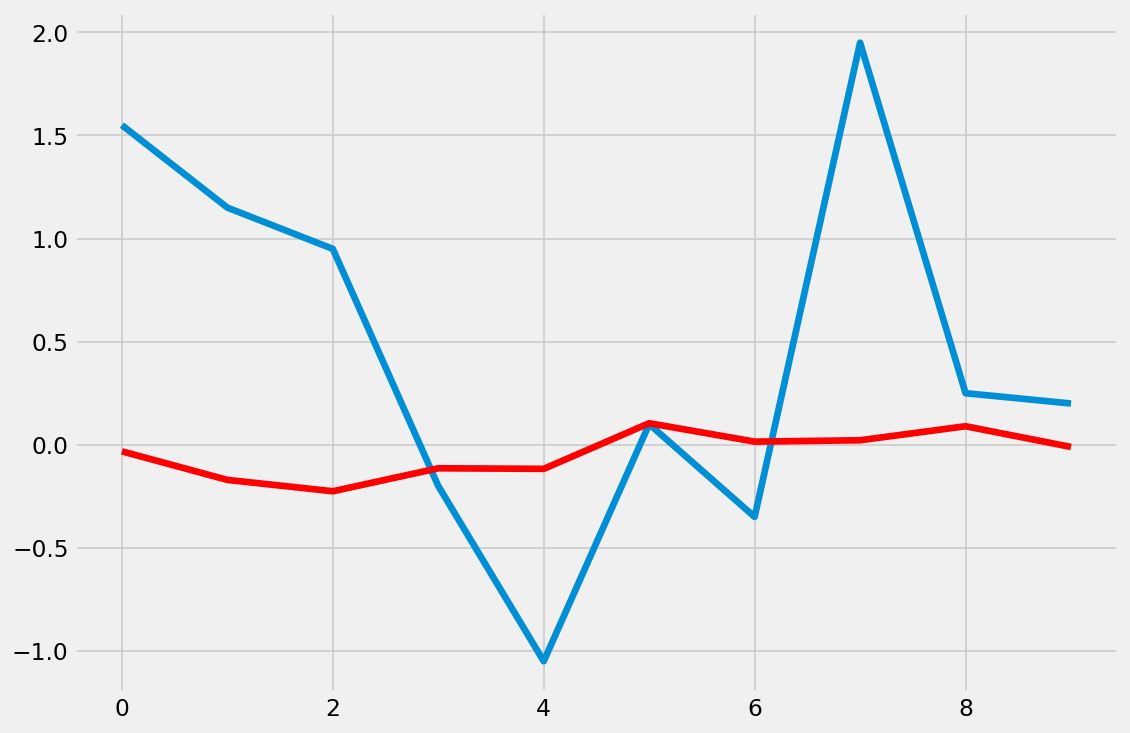

In [39]:
# create and evaluate a static autoregressive model
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['Temperature_S_Fiora'])
df['Temperature_diff1'] = np.append([0], ts_diff)
dataset = df['Temperature_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

# train autoregression
model = AutoReg(train, lags=12)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
 
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')

# **MA**


In [40]:
from statsmodels.tsa.arima_model import ARMA

u = 6
p = -0.2
T = 500
mean = u
w = np.random.normal(loc=0, scale=1, size=500)
data = np.zeros(500)
data[0] = 4 + w[0]
for i in range(1,500):
    data[i] = 4 + w[i] - 0.2*w[i-1]

In [ ]:
# fit model
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)
print(model_fit.params)

[ 3.97900589 -0.2555751 ]


Coefficients: [ 1.77026983e-03 -4.17763822e-02 -1.75673558e-01 -1.34299182e-01
 -1.10119715e-01 -6.39832226e-02 -1.91937639e-02 -5.74206747e-03
 -1.26353071e-02 -2.25368622e-03 -1.10617833e-02  4.56795593e-03
 -1.08009115e-02  3.19147241e+00]
predicted=-0.056766, expected=0.000000
predicted=-0.159142, expected=1.100000
predicted=-0.192357, expected=3.150000
predicted=-0.099119, expected=-2.250000
predicted=-0.125886, expected=2.200000
predicted=0.003382, expected=0.750000
predicted=-0.013829, expected=-1.700000
predicted=-0.032604, expected=0.050000
predicted=0.016493, expected=-0.300000
predicted=-0.016743, expected=0.950000
predicted=0.009124, expected=1.550000
predicted=-0.010362, expected=1.150000
predicted=0.001770, expected=0.950000
predicted=0.001770, expected=-0.200000
predicted=0.001770, expected=-1.050000
predicted=0.001770, expected=0.100000
predicted=0.001770, expected=-0.350000
predicted=0.001770, expected=1.950000
predicted=0.001770, expected=0.250000
predicted=0.001770, 

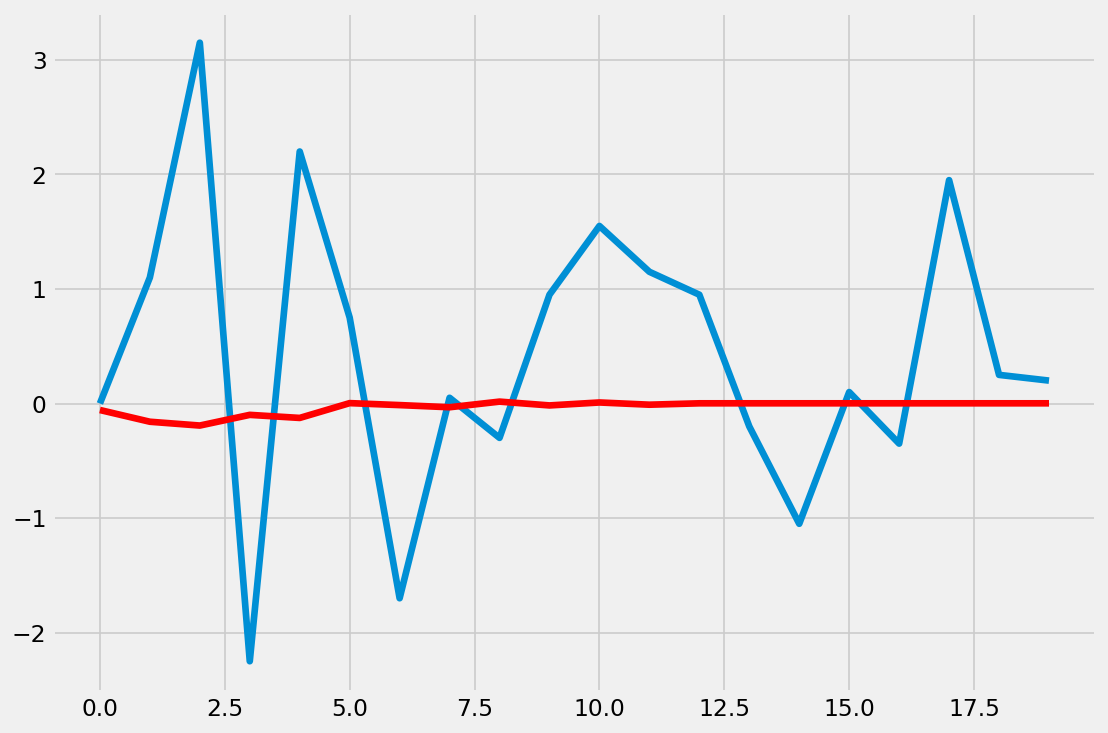

In [41]:
# create and evaluate a MA 
from statsmodels.tsa.arima.model import ARIMA

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['Temperature_S_Fiora'])
df['Temperature_diff1'] = np.append([0], ts_diff)
dataset = df['Temperature_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-20:]

# train MA
model = ARIMA(train, order=(0, 0, 12))
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
 
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# **ARIMA**

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Coefficients: [ 2.14203794e-03  6.37746868e-01 -4.80455907e-01  2.41715974e-01
 -6.79786788e-01  3.32351642e-01 -2.84181418e-01 -9.95648937e-02
 -1.62747510e-02  3.19129368e+00]
predicted=-0.538296, expected=0.750000
predicted=-0.295478, expected=-1.700000
predicted=-0.156004, expected=0.050000
predicted=-0.060313, expected=-0.300000
predicted=-0.028166, expected=0.950000
predicted=-0.025406, expected=1.550000
predicted=-0.015961, expected=1.150000
predicted=-0.003494, expected=0.950000
predicted=0.000587, expected=-0.200000
predicted=-0.000518, expected=-1.050000
predicted=-0.000169, expected=0.100000
predicted=0.001570, expected=-0.350000
predicted=0.002245, expected=1.950000
predicted=0.001924, expected=0.250000
predicted=0.001815, expected=0.200000
ARIMA(3,0,5) --> AIC=29935.266407829724; BIC=30004.468961978804
Test RMSE: 0.987


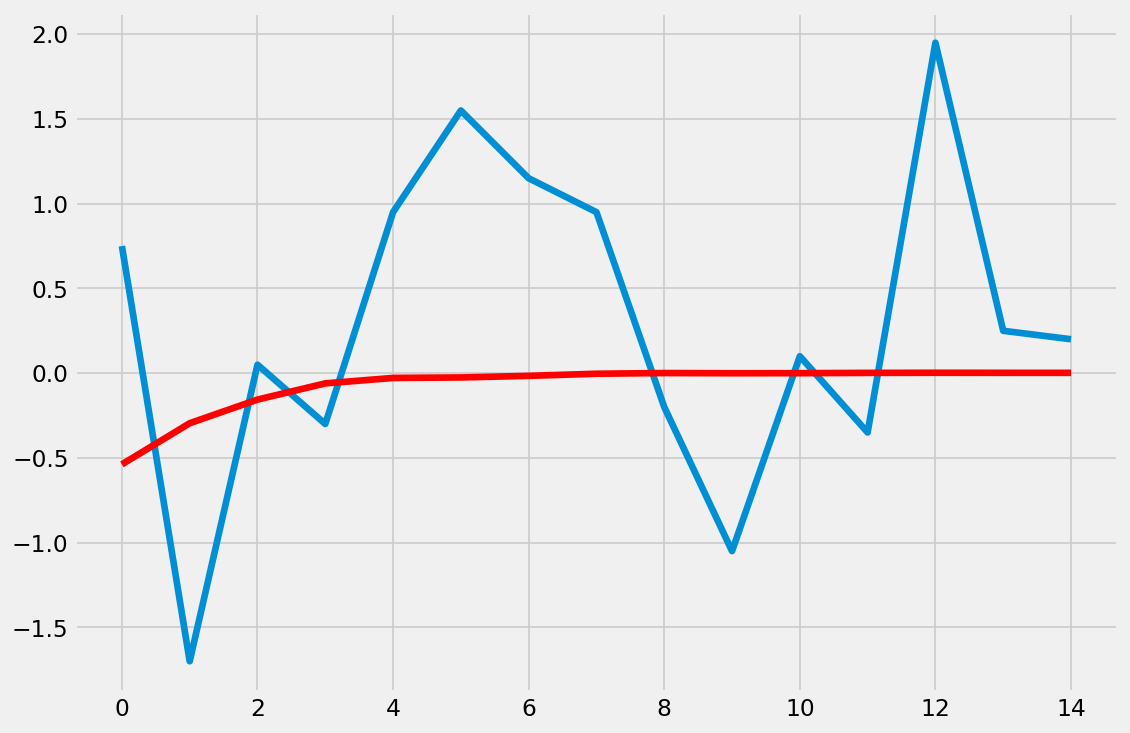

In [42]:
# create and evaluate a ARMA model
from statsmodels.tsa.arima.model import ARIMA

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['Temperature_S_Fiora'])
df['Temperature_diff1'] = np.append([0], ts_diff)
dataset = df['Temperature_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-5], dataset[size_dataset-15:]
order = (3, 0, 5)

# fit model
model = ARIMA(train, order=order)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
 

model_name = 'ARIMA({},{},{})'.format(order[0], order[1], order[2])
print('{} --> AIC={}; BIC={}'.format(model_name, model_fit.aic, model_fit.bic))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


# **ARMA**

Coefficients: [ 0.00177937 -0.56640849  0.42199501  0.52479513 -0.62113129 -0.21672786
 -0.11280036 -0.0698844  -0.01975416]
predicted=-0.130190, expected=0.000000
predicted=-0.140092, expected=1.100000
predicted=-0.197406, expected=3.150000
predicted=-0.065498, expected=-2.250000
predicted=-0.115726, expected=2.200000
predicted=0.019225, expected=0.750000
predicted=-0.057688, expected=-1.700000
predicted=0.042824, expected=0.050000
predicted=-0.046564, expected=-0.300000
predicted=0.046482, expected=0.950000
predicted=-0.043941, expected=1.550000
predicted=0.046540, expected=1.150000
predicted=-0.042867, expected=0.950000
predicted=0.045957, expected=-0.200000
predicted=-0.042084, expected=-1.050000
predicted=0.045266, expected=0.100000
predicted=-0.041362, expected=-0.350000
predicted=0.044566, expected=1.950000
predicted=-0.040661, expected=0.250000
predicted=0.043874, expected=0.200000
Test RMSE: 1.354


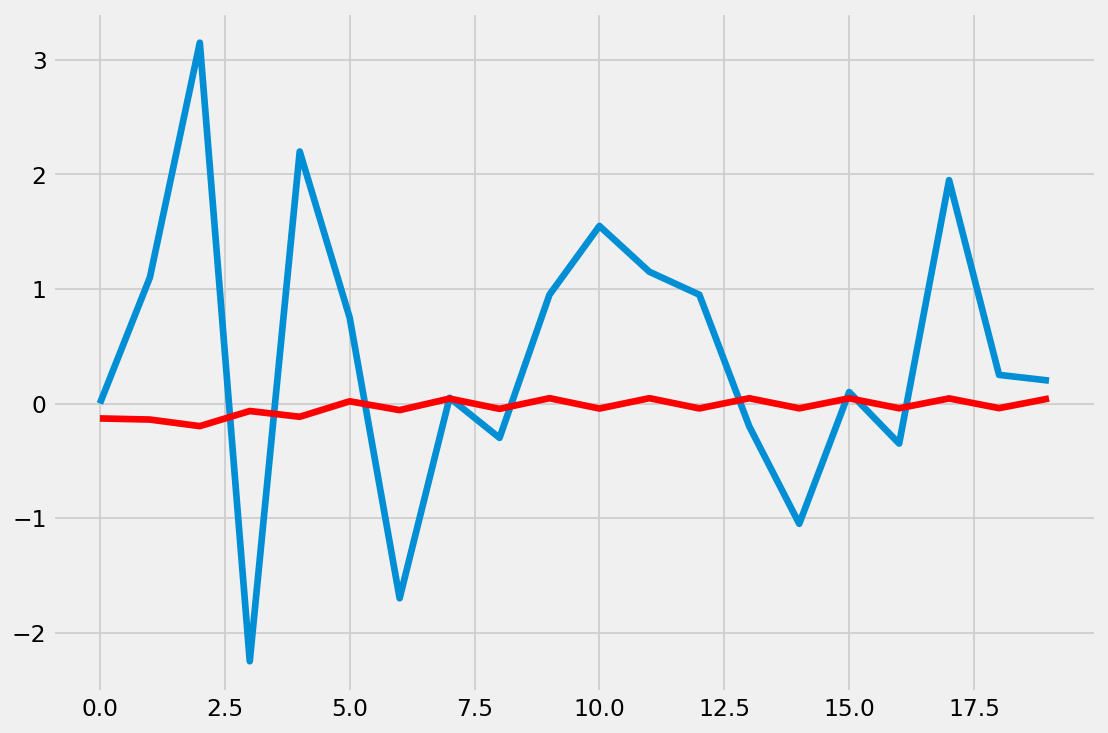

In [43]:

# create and evaluate a ARMA model
from statsmodels.tsa.arima_model import ARMA

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['Temperature_S_Fiora'])
df['Temperature_diff1'] = np.append([0], ts_diff)
dataset = df['Temperature_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-20:]

# fit model
model = ARMA(train, order=(2, 6))
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
 
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()